## Atmospheric corrected spectrums from march 2023, HYPSO 1 captures

### Uploading the data

In [1]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = ".." ## filene hentes fra en mappe over der vi er nå

In [16]:
frohavet_path_0316 = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1a.nc")
frohavet_path_0316_b = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1b.nc")
frohavet_path_0316_c = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1c.nc")
frohavet_path_0316_d = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1d.nc")

satobj_h1 = Hypso1( path = frohavet_path_0316, verbose = True )

l1a_cube = satobj_h1.l1a_cube
l1b_cube = Hypso1( path = frohavet_path_0316_b, verbose = True )
l1c_cube = Hypso1( path = frohavet_path_0316_c, verbose = True )
l1d_cube = Hypso1( path = frohavet_path_0316_d, verbose = True )

l1c_cube = l1c_cube.l1c_cube
l1b_cube = l1b_cube.l1b_cube
l1d_cube = l1d_cube.l1d_cube

satobj_h1.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1837
[INFO] ADCS time range: 1678962780.000000 to 1678963680.000000
[INFO] Frame time range: 1678963448.503009 to 1678963491.912100
[INFO] 173 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [2]:
frohavet_path_0328 = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1a.nc")
frohavet_path_0328_b = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1b.nc")
frohavet_path_0328_c = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1c.nc")
frohavet_path_0328_d = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1d.nc")

satobj_h1_0328 = Hypso1( path = frohavet_path_0328, verbose = True )

l1a_cube_0328 = satobj_h1_0328.l1a_cube
l1b_cube_0328 = Hypso1( path = frohavet_path_0328_b, verbose = True )
l1c_cube_0328 = Hypso1( path = frohavet_path_0328_c, verbose = True )
l1d_cube_0328 = Hypso1( path = frohavet_path_0328_d, verbose = True )

l1c_cube_0328 = l1c_cube_0328.l1c_cube
l1b_cube_0328 = l1b_cube_0328.l1b_cube
l1d_cube_0328 = l1d_cube_0328.l1d_cube

satobj_h1_0328.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1837
[INFO] ADCS time range: 1680000480.000000 to 1680001440.000000
[INFO] Frame time range: 1680001161.388534 to 1680001204.797625
[INFO] 174 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [3]:
frohavet_path_0329 = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1a.nc")
frohavet_path_0329_b = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1b.nc")
frohavet_path_0329_c = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1c.nc")
frohavet_path_0329_d = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1d.nc")

satobj_h1_0329 = Hypso1( path = frohavet_path_0329, verbose = True )

l1a_cube_0329 = satobj_h1_0329.l1a_cube
l1b_cube_0329 = Hypso1( path = frohavet_path_0329_b, verbose = True )
l1c_cube_0329 = Hypso1( path = frohavet_path_0329_c, verbose = True )
l1d_cube_0329 = Hypso1( path = frohavet_path_0329_d, verbose = True )

l1c_cube_0329 = l1c_cube_0329.l1c_cube
l1b_cube_0329 = l1b_cube_0329.l1b_cube
l1d_cube_0329 = l1d_cube_0329.l1d_cube

satobj_h1_0329.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1678
[INFO] ADCS time range: 1680086040.000000 to 1680086915.000000
[INFO] Frame time range: 1680086691.474726 to 1680086734.883817
[INFO] 174 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [4]:
fro_230330 = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1a.nc")
fro_230330_b = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1b.nc")
fro_230330_c = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1c.nc")
fro_230330_d = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1d.nc")

satobj_h1_230330 = Hypso1( path = fro_230330, verbose = True )

l1a_cube_230330 = satobj_h1_230330.l1a_cube
l1b_cube_230330 = Hypso1( path = fro_230330_b, verbose = True )
l1c_cube_230330 = Hypso1( path = fro_230330_c, verbose = True )
l1d_cube_230330 = Hypso1( path = fro_230330_d, verbose = True )

l1c_cube_230330 = l1c_cube_230330.l1c_cube
l1b_cube_230330 = l1b_cube_230330.l1b_cube
l1d_cube_230330 = l1d_cube_230330.l1d_cube

satobj_h1_230330.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1921
[INFO] ADCS time range: 1680171540.000000 to 1680172458.250000
[INFO] Frame time range: 1680172226.731407 to 1680172276.481407
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

In [5]:
l1d_cube_230330.shape

(598, 1092, 120)

### Defining variables

In [6]:
#extract wanted waelengths
wl = satobj_h1_230330.wavelengths[4:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[4:118]

target_lat_6 = [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561] #område 7
target_lon_6 = [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]  

target_lat_5 = [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004] #område 6.1
target_lon_5 = [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283]

target_lat_3 = [63.818490304354434,63.793837321385155, 63.65192496143867, 63.660555970548074] #område 2.1.
target_lon_3 = [9.531415429238418, 9.442656298818237,9.526455044589706,9.439764451470932]

target_lat_2 = [63.646767083517425,63.61771951990031, 63.47865598622861, 63.42721372576498] #område 5.1
target_lon_2 = [9.804697410334523, 9.723689711502818,10.061035990832918,9.982929114384596]  

target_lat_1 = [63.52676744792975, 63.55113867486421, 63.44802428401152, 63.46332195091103] #område 8 
target_lon_1 = [10.726421572030368, 10.227932960954064, 10.706024496195505, 10.211631333282082] 

importlib.reload(ac)
importlib.reload(f)

<module 'funcions_autonom' from '/home/itk/Documents/AnneMarthe/Master/Hypos_analyse/funcions_autonom.py'>

In [18]:
cube_0316 = np.array(l1d_cube[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0316.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0316 = (cube_0316 - S) /T
cube_norm_0316[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.1301401816368606
0.04033158572291059
0.0043536260012921185
0.002610166159932221
0.002069329725571627
0.0017488788983443101
0.0015675562437948837
0.0014519269304219705
0.0013700519783459366
0.0013086587127885204
0.0012609767983272498
0.0012230276420337283
0.001192251102317362
0.0011669748753443952
0.0011459015869627446
0.0011280356408282881
0.0011126720398337505
0.0010992849776469491
0.0010874772747466084
0.0010769473522588711


In [19]:
cube_0328 = np.array(l1d_cube_0328[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_0328, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0328.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0328 = (cube_0328 - S) /T
cube_norm_0328[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0072687712303497
0.0023336148293508266
0.0012809577941815683
0.0009450474458930948
0.0007919202743752482
0.0007168868302497517
0.0006784479805528784
0.000658309420355427
0.0006464645123131045
0.000639303298042594
0.0006346317471921651


In [8]:
cube_0329 = np.array(l1d_cube_0329[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_0329, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0329.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0329 = (cube_0329 - S) /T
cube_norm_0329[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0038781326811564987
0.0013346422662408501
0.0007336935341614267
0.0005544286898249861
0.000475959260024501
0.0004390181586600214
0.00042171704807263035
0.00041275304322712714
0.00040734874093377503
0.0004038078793395568


In [9]:
cube_0330 = np.array(l1d_cube_230330[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_230330, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0330.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0330 = (cube_0330 - S) /T
cube_norm_0330[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0035676612324148167
0.001245527125829396
0.0006724815614877414
0.0005202119703314721
0.00045535308963129975
0.0004240978869840134
0.00040827547054184295
0.0003999482628148956
0.00039519252738591325
0.00039218518750474787


In [10]:
print(cube_norm_0330.shape) ## says whats x and y values here. Last dimesion is wawelengths at at each pixel 

(598, 1092, 114)


### Getting the piksel postions of the wanted areas HTPSO1 ATM corrected

In [20]:
latitudes_0316 = satobj_h1.latitudes
longitudes_0316 = satobj_h1.longitudes

piksel_row_0316, piksel_col_0316 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0316, longitudes_0316) #from file funcions_autonom.py
print(piksel_row_0316, piksel_col_0316) #sjekker at det er riktig

rss_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_0316, piksel_col_0316, satobj_h1) 
print(rss_0316.shape) #sjekker at det er riktig

median_0316_atmc = np.median(rss_0316, axis=0)

normaized_spectrum_median_0316 = f.min_max_nomralization(median_0316_atmc)

l2_norm_0316 = np.linalg.norm(median_0316_atmc)  #l2 norm
l2_normalized_spectrum_0316 = median_0316_atmc / l2_norm_0316  #l2 normalisering

[np.int64(530), np.int64(544), np.int64(583), np.int64(586)] [np.int64(339), np.int64(369), np.int64(253), np.int64(300)]
Pixel number:  607
(607, 114)


In [21]:
latitudes_0328 = satobj_h1_0328.latitudes
longitudes_0328 = satobj_h1_0328.longitudes

piksel_row_0328, piksel_col_0328 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0328, longitudes_0328) #from file funcions_autonom.py
print(piksel_row_0328, piksel_col_0328) #sjekker at det er riktig

rss_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_0328, piksel_col_0328, satobj_h1_0328) 
print(rss_0328.shape) #sjekker at det er riktig

median_0328_atmc = np.median(rss_0328, axis=0)

normaized_spectrum_median_0328 = f.min_max_nomralization(median_0328_atmc)

l2_norm_0328 = np.linalg.norm(median_0328_atmc)  #l2 norm
l2_normalized_spectrum_0328 = median_0328_atmc / l2_norm_0328  #l2 normalisering

[np.int64(534), np.int64(548), np.int64(586), np.int64(589)] [np.int64(364), np.int64(384), np.int64(297), np.int64(330)]
Pixel number:  604
(604, 114)


In [22]:
latitudes_0329 = satobj_h1_0329.latitudes
longitudes_0329 = satobj_h1_0329.longitudes

piksel_row_0329, piksel_col_0329 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0329, longitudes_0329) #from file funcions_autonom.py
print(piksel_row_0329, piksel_col_0329) #sjekker at det er riktig

rss_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_0329, piksel_col_0329, satobj_h1_0329) 
print(rss_0329.shape) #sjekker at det er riktig

rss_u_0329 = f.water_masked_rss_matrix(piksel_row_0329, piksel_col_0329, l1d_cube_0329, satobj_h1_0329)
print(rss_u_0329.shape)

median_0329_atmc = np.median(rss_0329, axis=0)
median_0329_u = np.median(rss_0329, axis = 1)

normaized_spectrum_median_0329 = f.min_max_nomralization(median_0329_atmc)

l2_norm_0329 = np.linalg.norm(median_0329_atmc)  #l2 norm
l2_normalized_spectrum_0329 = median_0329_atmc / l2_norm_0329  #l2 normalisering

[np.int64(515), np.int64(528), np.int64(568), np.int64(570)] [np.int64(316), np.int64(346), np.int64(232), np.int64(279)]
Pixel number:  582
(582, 114)
Pixel number:  1407
(110, 1407)


In [23]:
latitudes_0330 = satobj_h1_230330.latitudes
longitudes_0330 = satobj_h1_230330.longitudes

piksel_row_0330, piksel_col_0330 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0330, longitudes_0330) #from file funcions_autonom.py

print(piksel_row_0330, piksel_col_0330) #sjekker at det er riktig

rss_0330 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_0330, piksel_col_0330, satobj_h1_230330) 
print(rss_0330.shape) #sjekker at det er riktig

median_0330_atmc = np.median(rss_0330, axis=0)
median_0330_atmc.shape

normaized_spectrum_median_0330 = f.min_max_nomralization(median_0330_atmc)

l2_norm_0330 = np.linalg.norm(median_0330_atmc)  #l2 norm
l2_normalized_spectrum_0330 = median_0330_atmc / l2_norm_0330  #l2 normalisering

[np.int64(185), np.int64(192), np.int64(215), np.int64(216)] [np.int64(447), np.int64(490), np.int64(350), np.int64(412)]
Pixel number:  519
(519, 114)


### Plotting the atmc RSS, median 

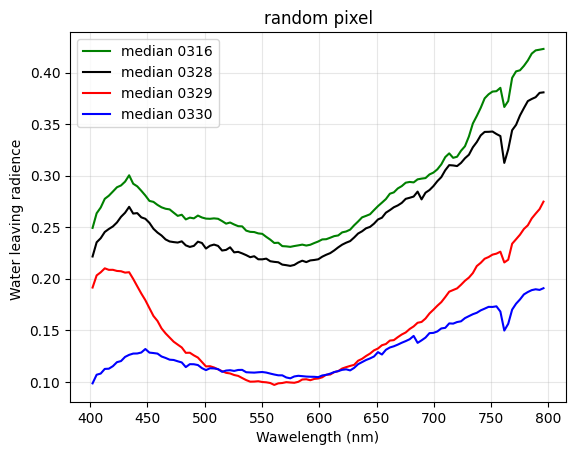

In [27]:
plt.plot(wl, median_0316_atmc, color = 'green', label = 'median 0316')
plt.plot(wl, median_0328_atmc, color='black', label='median 0328')
plt.plot(wl, median_0329_atmc, color='red', label='median 0329')
plt.plot(wl, median_0330_atmc, color='blue', label='median 0330')

#plt.plot(wl, normaized_spectrum_median_0328, color='black', linestyle='--', label='normaized median 0328')
#plt.plot(wl, normaized_spectrum_median_0329, color='red', linestyle='--', label='normaized median 0329')
#plt.plot(wl, normaized_spectrum_median_0330, color='blue', linestyle='--', label='normaized median 0330')

#plt.plot(wl, l2_normalized_spectrum_0328, color='black', label='l2 normalized median 0328')
#plt.plot(wl, l2_normalized_spectrum_0329, color='red', label='l2 normalized median 0329')
#plt.plot(wl, l2_normalized_spectrum_0330, color='blue', label='l2 normalized median 0330')

plt.xlabel("Wawelength (nm)")
plt.ylabel("Water leaving radience ") #finne enheten her [sr^{-1}]
plt.title("random pixel")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


### Standarizing plots

In [25]:
medians = [rss_0328, rss_0329, rss_0330]
scaler = StandardScaler()
scaled_medians = scaler.fit_transform(medians)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

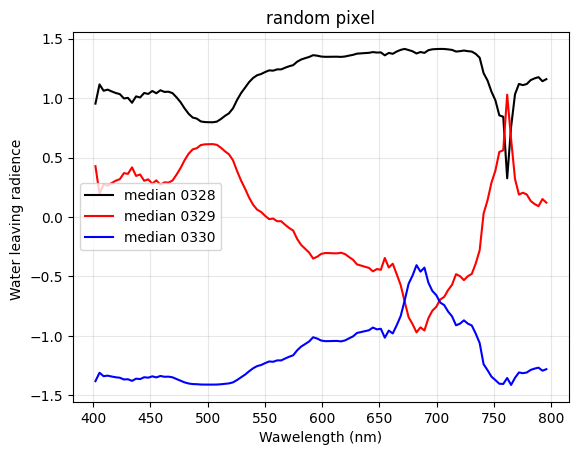

In [ ]:
plt.plot(wl, scaled_medians[0], color='black', label='median 0328')
plt.plot(wl, scaled_medians[1], color='red', label='median 0329')
plt.plot(wl, scaled_medians[2], color='blue', label='median 0330')

plt.xlabel("Wawelength (nm)")
plt.ylabel("Water leaving radience ") #finne enheten her [sr^{-1}]
plt.title("random pixel")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()